<a href="https://colab.research.google.com/github/Meet-13/Depth-Estimation/blob/main/Depth_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torch

In [ ]:
def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

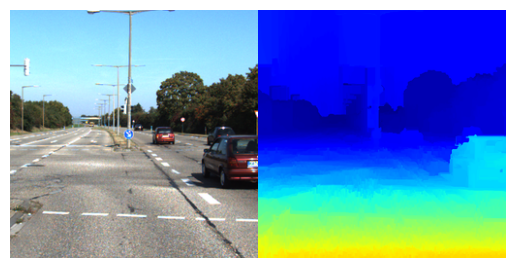

In [ ]:
read_image('/content/drive/MyDrive/Dataset/training/10012003.png')

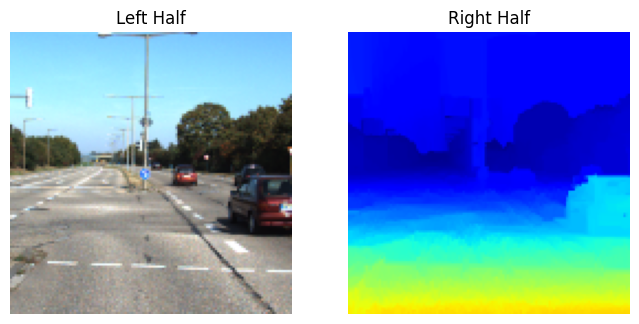

In [ ]:
def split_resize_and_display(image_path, target_height, target_width):
    # Read the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to read the image at '{image_path}'")
        return

    # Split the image into two halves width-wise
    height, width, _ = image.shape
    half_width = width // 2
    left_half = image[:, :half_width, :]
    right_half = image[:, half_width:, :]

    # Resize each half to the target size
    left_half = cv2.resize(left_half, (target_width, target_height))
    right_half = cv2.resize(right_half, (target_width, target_height))

    # Display the left and right halves
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Left Half")
    plt.imshow(cv2.cvtColor(left_half, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Right Half")
    plt.imshow(cv2.cvtColor(right_half, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

# Example usage
image_path = "/content/drive/MyDrive/Dataset/training/10012003.png"  # Replace with the path to your image
target_height = 128  # Replace with your desired target height
target_width = 128  # Replace with your desired target width
split_resize_and_display(image_path, target_height, target_width)


In [ ]:
def split_resize_and_save(input_folder, output_folder, target_height, target_width):
    # Create output folders for 'left' and 'right'
    left_folder = os.path.join(output_folder, 'left')
    right_folder = os.path.join(output_folder, 'right')
    os.makedirs(left_folder, exist_ok=True)
    os.makedirs(right_folder, exist_ok=True)

    # Process each image in the input folder
    for idx, filename in enumerate(os.listdir(input_folder)):
        # Read the image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Unable to read the image at '{image_path}'")
            continue

        # Split the image into two halves width-wise
        height, width, _ = image.shape
        half_width = width // 2
        left_half = image[:, :half_width, :]
        right_half = image[:, half_width:, :]

        # Resize each half to the target size
        left_half = cv2.resize(left_half, (target_width, target_height))
        right_half = cv2.resize(right_half, (target_width, target_height))

        # Save the left and right halves with a sequential index
        left_filename = f"{idx + 1}.jpg"
        right_filename = f"{idx + 1}.jpg"
        cv2.imwrite(os.path.join(left_folder, left_filename), left_half)
        cv2.imwrite(os.path.join(right_folder, right_filename), right_half)

# Example usage
input_dataset_folder = "/content/drive/MyDrive/Dataset/training"  # Replace with the path to your dataset folder
output_dataset_folder = "/content/drive/MyDrive/Dataset/training1"  # Replace with the desired output folder
target_height = 200  # Replace with your desired target height
target_width = 150  # Replace with your desired target width

split_resize_and_save(input_dataset_folder, output_dataset_folder, target_height, target_width)


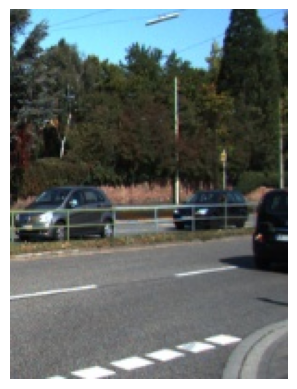

In [ ]:
read_image('/content/drive/MyDrive/Dataset/training1/left/1.jpg')

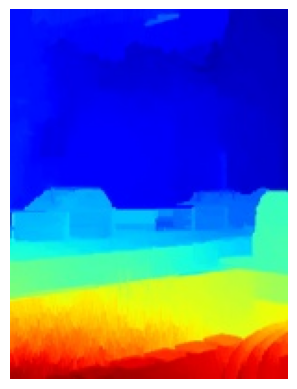

In [ ]:
read_image('/content/drive/MyDrive/Dataset/training1/right/1.jpg')

In [ ]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch

def pil_loader(path):
    with open(path, 'rb') as f:
        return Image.open(f).convert('RGB')

# Define a transformation for converting images to tensors
to_tensor = transforms.ToTensor()

def preprocess_images(normal_folder, thermal_folder, output_folder):
    normal_images = os.listdir(normal_folder)

    for normal_image_name in normal_images:
        normal_path = os.path.join(normal_folder, normal_image_name)
        thermal_path = os.path.join(thermal_folder, normal_image_name)  # Same names in both folders

        if os.path.isfile(thermal_path):
            # Load normal (RGB) image
            normal_image = pil_loader(normal_path)

            # Convert normal image to tensor and normalize
            normal_tensor = to_tensor(normal_image)

            # Load thermal color map image
            thermal_image = pil_loader(thermal_path)

            # Convert thermal image to tensor
            thermal_tensor = to_tensor(thermal_image)

            # Create a dictionary for the current training item
            training_item = {"color": normal_tensor, "thermal": thermal_tensor}

            output_path = os.path.join(output_folder, f"{normal_image_name}.pth")
            torch.save(training_item, output_path)

normal_folder_path = '/content/drive/MyDrive/Dataset/training1/left'
thermal_folder_path = '/content/drive/MyDrive/Dataset/training1/right'
output_folder_path = '/content/drive/MyDrive/Dataset/training_dict'

preprocess_images(normal_folder_path, thermal_folder_path, output_folder_path)


KeyboardInterrupt: 

In [ ]:
# Example usage
output_path = '/content/drive/MyDrive/Dataset/training_dict/1.jpg.pth'

# Load the saved dictionary
loaded_dict = torch.load(output_path)

# Print the content of the loaded dictionary
print(loaded_dict)

{'color': tensor([[[0.3137, 0.2824, 0.2549,  ..., 0.4314, 0.4510, 0.4118],
         [0.2627, 0.2000, 0.2196,  ..., 0.4314, 0.3961, 0.3608],
         [0.2118, 0.2118, 0.2275,  ..., 0.4471, 0.3373, 0.3216],
         ...,
         [0.4392, 0.4196, 0.4039,  ..., 0.4078, 0.3843, 0.3725],
         [0.4353, 0.4314, 0.4039,  ..., 0.3686, 0.3490, 0.3373],
         [0.4353, 0.4667, 0.3882,  ..., 0.3216, 0.3098, 0.3098]],

        [[0.3569, 0.3216, 0.2941,  ..., 0.6431, 0.6275, 0.5686],
         [0.3059, 0.2392, 0.2471,  ..., 0.6431, 0.5608, 0.5059],
         [0.2510, 0.2471, 0.2353,  ..., 0.6549, 0.4863, 0.4510],
         ...,
         [0.4235, 0.4118, 0.4078,  ..., 0.4078, 0.3882, 0.3765],
         [0.4275, 0.4275, 0.4157,  ..., 0.3725, 0.3529, 0.3412],
         [0.4275, 0.4627, 0.4000,  ..., 0.3255, 0.3137, 0.3137]],

        [[0.3725, 0.3176, 0.2588,  ..., 0.9333, 0.8824, 0.8000],
         [0.3137, 0.2353, 0.2196,  ..., 0.9255, 0.7882, 0.7098],
         [0.2471, 0.2431, 0.2314,  ..., 0.9137, 

CDC module

In [ ]:
!pip install timm
!pip install 'git+https://github.com/saadnaeem-dev/pytorch-linear-warmup-cosine-annealing-warm-restarts-weight-decay'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from timm.models.layers import DropPath,trunc_normal_
import math
import torch.cuda
from __future__ import absolute_import, division, print_function
from collections import OrderedDict
import torch.optim as optim
from linear_warmup_cosine_annealing_warm_restarts_weight_decay import ChainedScheduler
import time
from torch.utils.data import Dataset, DataLoader

This AvgPool class is designed to apply average pooling with a kernel size of 3x3, stride of 2, and padding of 1, a specified number of times (ratio). The nn.ModuleList is used to store the individual pooling modules, and the forward method iterates through these modules to perform the pooling operations.








In [ ]:
class AvgPool(nn.Module):
    def __init__(self, ratio):
        """
        The AvgPool module.
        Args:
        - ratio: Number of times to apply the average pooling operation.
        """
        super().__init__()

        # Create a list of AvgPool2d modules with specified parameters
        self.pool = nn.ModuleList()
        for i in range(0, ratio):
            self.pool.append(nn.AvgPool2d(3, stride=2, padding=1))

    def forward(self, x):
        """
        Args:
        - x: Input tensor.
        Returns:
        - Output tensor after applying average pooling operations.
        """
        for pool in self.pool:
            x = pool(x)
        return x

Example

In [ ]:
output_path = '/content/drive/MyDrive/Dataset/training_dict/1.jpg.pth'
loaded_dict = torch.load(output_path)


# Your input tensor
input_tensor = loaded_dict['color']

avg_pool_module = AvgPool(ratio=1)

# Apply average pooling using your custom module
output_tensor = avg_pool_module(input_tensor.unsqueeze(0))  # unsqueeze to add batch and channel dimensions

# Print the dimensions of the input and output tensors
print("Input Tensor Size:", input_tensor.size())
print("Output Tensor Size:", output_tensor.squeeze().size())  # squeeze to remove batch and channel dimensions


Input Tensor Size: torch.Size([3, 200, 150])
Output Tensor Size: torch.Size([3, 100, 75])


This code defines a CDilated class in PyTorch, which represents a dilated convolutional layer. Dilated convolutions introduce gaps in the convolutional kernels, allowing the network to have a larger receptive field without increasing the number of parameters.The key idea behind dilated convolutions is to increase the receptive field without introducing additional parameters, which can be useful in capturing long-range dependencies in the input data.


In [ ]:
class CDilated(nn.Module):
  "This class defines the dilated convolution."
  """
      nIn: number of input channels
      nOut: number of output channels
      kSize: kernel size
      stride: optional stride rate for down-sampling
      d: optional dilation rate
  """
  def __init__(self,nIn,nOut,kSize,stride=1,d=1,groups=1,bias=False):
    super().__init__()
    padding=int((kSize-1)/2)*d
    self.conv=nn.Conv2d(nIn,nOut,kSize,stride=stride,padding=padding,bias=bias,dilation=d,groups=groups)
  def forward(self,input):
    output=self.conv(input)
    return output

  """
        input: input feature map
        output: transformed feature map
  """

This code defines a DilatedConv class in PyTorch, representing a single Dilated Convolution layer within a Consecutive Dilated Convolutions (CDC) module.

In [ ]:
class DilatedConv(nn.Module):
    """
    The Consecutive Dilated Convolutions (CDC) module.
    """
    def __init__(self, dim, k, dilation=1, stride=1, drop_path=0.,
                 layer_scale_init_value=1e-6, expan_ratio=6):
        """
        Args:
        - dim: Input dimension.
        - k: Kernel size.
        - dilation: Dilation rate.
        - stride: Stride for the convolution.
        - drop_path: Drop path rate.
        - layer_scale_init_value: Initial value for layer scale parameter.
        - expan_ratio: Inverted bottleneck residual expansion ratio.
        """

        super().__init__()

        # Depthwise separable convolution
        self.ddwconv = CDilated(dim, dim, kSize=k, stride=stride, groups=dim, d=dilation)
        # Batch normalization
        self.bn1 = nn.BatchNorm2d(dim)
        # Pointwise convolution 1
        self.pwconv1 = nn.Linear(dim, expan_ratio * dim)
        # GELU activation function
        self.act = nn.GELU()
        # Pointwise convolution 2
        self.pwconv2 = nn.Linear(expan_ratio * dim, dim)
        # Layer scale parameter (optional)
        self.gamma = nn.Parameter(layer_scale_init_value * torch.ones(dim),
                                  requires_grad=True) if layer_scale_init_value > 0 else None
        # DropPath layer (optional)
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        """
        Args:
        - x: Input tensor.
        Returns:
        - Output tensor.
        """
        input = x

        # Depthwise separable convolution
        x = self.ddwconv(x)
        # Batch normalization
        x = self.bn1(x)

        # Permute dimensions for linear layers
        x = x.permute(0, 2, 3, 1)  # (N, C, H, W) -> (N, H, W, C)
        # Pointwise convolution 1
        x = self.pwconv1(x)
        # GELU activation
        x = self.act(x)
        # Pointwise convolution 2
        x = self.pwconv2(x)
        # Scale using gamma if available
        if self.gamma is not None:
            x = self.gamma * x
        # Permute dimensions back
        x = x.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)
        # Residual connection with DropPath
        x = input + self.drop_path(x)

        return x

This code defines a PositionalEncodingFourier class in PyTorch, representing a positional encoding layer that relies on a Fourier kernel. This positional encoding technique helps inject information about the position of tokens in the input sequence, allowing attention mechanisms to consider token order when processing sequences.

In [ ]:
class PositionalEncodingFourier(nn.Module):
    def __init__(self, hidden_dim=32, dim=768, temperature=10000):
        super().__init__()

        # 1x1 convolution layer to project concatenated positional embeddings
        self.token_projection = nn.Conv2d(hidden_dim * 2, dim, kernel_size=1)

        # Scaling factor for sinusoidal functions
        self.scale = 2 * math.pi

        # Temperature for scaling positional embeddings
        self.temperature = temperature

        # Dimensions for hidden representation and output
        self.hidden_dim = hidden_dim
        self.dim = dim

    def forward(self, B, H, W):
        # Boolean mask indicating positions to be masked
        mask = torch.zeros(B, H, W).bool().to(self.token_projection.weight.device)

        # Invert the mask to create a mask for non-masked positions
        not_mask = ~mask

        # Cumulative sums along the height and width dimensions
        y_embed = not_mask.cumsum(1, dtype=torch.float32)
        x_embed = not_mask.cumsum(2, dtype=torch.float32)

        # Small epsilon value for numerical stability
        eps = 1e-6

        # Normalize cumulative sums to the range [0, 2*pi] using scaling factor
        y_embed = y_embed / (y_embed[:, -1:, :] + eps) * self.scale
        x_embed = x_embed / (x_embed[:, :, -1:] + eps) * self.scale

        # Scaling factor for the positional embeddings
        dim_t = torch.arange(self.hidden_dim, dtype=torch.float32, device=mask.device)
        dim_t = self.temperature ** (2 * (dim_t // 2) / self.hidden_dim)

        # Compute positional embeddings for x and y dimensions using sinusoidal functions
        pos_x = x_embed[:, :, :, None] / dim_t
        pos_y = y_embed[:, :, :, None] / dim_t

        # Stack sinusoidal functions for both sin and cos components
        pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(),
                             pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(),
                             pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)

        # Concatenate positional embeddings along x and y dimensions
        pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)

        # Project concatenated positional embeddings
        pos = self.token_projection(pos)

        return pos

This code defines a PyTorch module for Cross-Covariance Attention (XCA). The XCA operation involves updating the channels of the input tensor using a weighted sum, where the weights are obtained from the softmax-normalized cross-covariance matrix of query (Q) and key (K).

In [ ]:
class XCA(nn.Module):
    """Cross-Covariance Attention (XCA) operation where channels are updated using a weighted sum.
    Weights are obtained from the (softmax normalized) Cross-covariance matrix (Q^T K).
    """

    def __init__(self, dim, num_heads=8, qkv_bias=False, attn_drop=0., proj_drop=0.):
        """
        Initialize the XCA module.

        Args:
        - dim (int): Input dimension of the tensor.
        - num_heads (int): Number of attention heads.
        - qkv_bias (bool): Whether to include bias in the linear transformation for Q, K, and V.
        - attn_drop (float): Dropout rate for attention weights.
        - proj_drop (float): Dropout rate for the projected output.
        """
        super().__init__()
        self.num_heads = num_heads

        # Learnable parameter for temperature in softmax
        self.temperature = nn.Parameter(torch.ones(num_heads, 1, 1))

        # Linear transformation for Q, K, and V
        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)

        # Dropout for attention weights
        self.attn_drop = nn.Dropout(attn_drop)

        # Linear projection after attention
        self.proj = nn.Linear(dim, dim)

        # Dropout for projected output
        self.proj_drop = nn.Dropout(proj_drop)

    def forward(self, x):
        """
        Forward pass of the XCA module.

        Args:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensor after cross-covariance attention.
        """
        B, N, C = x.shape

        # Linear transformation for Q, K, and V
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        # Transpose Q, K, and V
        q = q.transpose(-2, -1)
        k = k.transpose(-2, -1)
        v = v.transpose(-2, -1)

        # Normalize Q and K
        q = torch.nn.functional.normalize(q, dim=-1)
        k = torch.nn.functional.normalize(k, dim=-1)

        # Compute attention weights using cross-covariance
        attn = (q @ k.transpose(-2, -1)) * self.temperature
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        # Apply attention to V and reshape the output
        x = (attn @ v).permute(0, 3, 1, 2).reshape(B, N, C)

        # Linear projection after attention
        x = self.proj(x)
        x = self.proj_drop(x)

        return x

    @torch.jit.ignore
    def no_weight_decay(self):
        """
        Specify parameters that should not undergo weight decay during optimization.

        Returns:
        - dict: Dictionary containing parameter names.
        """
        return {'temperature'}

This code defines a PyTorch module for the Local-Global Features Interaction (LGFI) block.The LGFI block aims to capture both local and global features by incorporating the XCA mechanism and an inverted bottleneck structure. It combines the XCA output with the input and applies the inverted bottleneck block for feature transformation.

In [ ]:
import torch
import torch.nn as nn

class LGFI(nn.Module):
    """
    Local-Global Features Interaction (LGFI) module.
    """
    def __init__(self, dim, drop_path=0., layer_scale_init_value=1e-6, expan_ratio=6,
                 use_pos_emb=True, num_heads=6, qkv_bias=True, attn_drop=0., drop=0.):
        """
        Initialize the LGFI module.

        Args:
        - dim (int): Input dimension of the tensor.
        - drop_path (float): Drop path rate.
        - layer_scale_init_value (float): Initial value for layer scale parameters.
        - expan_ratio (int): Inverted bottleneck residual expansion ratio.
        - use_pos_emb (bool): Whether to use positional embeddings.
        - num_heads (int): Number of attention heads for XCA (Cross-Covariance Attention).
        - qkv_bias (bool): Whether to include bias in the linear transformation for Q, K, and V in XCA.
        - attn_drop (float): Dropout rate for attention weights in XCA.
        - drop (float): Dropout rate for other layers.
        """
        super().__init__()

        self.dim = dim
        self.pos_embd = None

        # Positional Encoding (Fourier) if enabled
        if use_pos_emb:
            self.pos_embd = PositionalEncodingFourier(dim=self.dim)

        # Layer normalization and XCA (Cross-Covariance Attention)
        self.norm_xca = LayerNorm(self.dim, eps=1e-6)
        self.gamma_xca = nn.Parameter(layer_scale_init_value * torch.ones(self.dim),
                                      requires_grad=True) if layer_scale_init_value > 0 else None
        self.xca = XCA(self.dim, num_heads=num_heads, qkv_bias=qkv_bias, attn_drop=attn_drop, proj_drop=drop)

        # Additional processing using inverted bottleneck
        self.norm = LayerNorm(self.dim, eps=1e-6)
        self.pwconv1 = nn.Linear(self.dim, expan_ratio * self.dim)
        self.act = nn.GELU()
        self.pwconv2 = nn.Linear(expan_ratio * self.dim,self.dim)
        self.gamma = nn.Parameter(layer_scale_init_value * torch.ones((self.dim)),
                                  requires_grad=True) if layer_scale_init_value > 0 else None

        # Drop path layer (optional)
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        """
        Forward pass of the LGFI module.

        Args:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensor after Local-Global Features Interaction.
        """
        input_ = x

        # XCA (Cross-Covariance Attention)
        B, C, H, W = x.shape
        x = x.reshape(B, C, H * W).permute(0, 2, 1)

        # Apply positional encoding if enabled
        if self.pos_embd:
            pos_encoding = self.pos_embd(B, H, W).reshape(B, -1, x.shape[1]).permute(0, 2, 1)
            x = x + pos_encoding

        # Apply XCA and update channels
        x = x + self.gamma_xca * self.xca(self.norm_xca(x))

        # Reshape back to original dimensions
        x = x.reshape(B, H, W, C)

        # Inverted Bottleneck
        x = self.norm(x)
        x = self.pwconv1(x)
        x = self.act(x)
        x = self.pwconv2(x)

        # Scale using gamma if available
        if self.gamma is not None:
            x = self.gamma * x

        # Permute dimensions back
        x = x.permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)

        # Residual connection with DropPath
        x = input_ + self.drop_path(x)

        return x


This code defines a PyTorch module for a sequence of batch normalization followed by GELU activation, encapsulated in the BNGELU class.The purpose of combining batch normalization with GELU activation is to normalize the input and then apply a non-linear activation function, introducing non-linearity and aiding in the convergence of neural networks during training. The BNGELU module can be used in neural network architectures to add these normalization and activation operations.

In [ ]:
class BNGELU(nn.Module):
    """
    Batch Normalization followed by GELU activation.
    """
    def __init__(self, nIn):
        """
        Initialize the BNGELU module.

        Args:
        - nIn (int): Number of input channels.
        """
        super().__init__()

        # Batch Normalization layer
        self.bn = nn.BatchNorm2d(nIn, eps=1e-5)

        # GELU activation function
        self.act = nn.GELU()

    def forward(self, x):
        """
        Forward pass of the BNGELU module.

        Args:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensor after Batch Normalization and GELU activation.
        """
        # Apply Batch Normalization
        output = self.bn(x)

        # Apply GELU activation
        output = self.act(output)

        return output

This code defines a PyTorch module for a convolutional layer with optional batch normalization and GELU activation.This Conv module is flexible and can be used to create convolutional layers with or without batch normalization and GELU activation, depending on the specified configuration.

In [ ]:
import torch
import torch.nn as nn

class Conv(nn.Module):
    """
    Convolutional layer with optional Batch Normalization and GELU activation.
    """
    def __init__(self, nIn, nOut, kSize, stride, padding=0, dilation=(1, 1), groups=1, bn_act=False, bias=False):
        """
        Initialize the Conv module.

        Args:
        - nIn (int): Number of input channels.
        - nOut (int): Number of output channels.
        - kSize (int or tuple): Kernel size for the convolution.
        - stride (int or tuple): Stride for the convolution.
        - padding (int or tuple): Padding for the convolution (default is 0).
        - dilation (int or tuple): Dilation for the convolution (default is (1, 1)).
        - groups (int): Number of groups for group convolution (default is 1).
        - bn_act (bool): Whether to apply Batch Normalization and GELU activation (default is False).
        - bias (bool): Whether to include bias in the convolution (default is False).
        """
        super().__init__()

        self.bn_act = bn_act

        # Convolutional layer
        self.conv = nn.Conv2d(nIn, nOut, kernel_size=kSize,
                              stride=stride, padding=padding,
                              dilation=dilation, groups=groups, bias=bias)

        # Batch Normalization and GELU activation if enabled
        if self.bn_act:
            self.bn_gelu = BNGELU(nOut)

    def forward(self, x):
        """
        Forward pass of the Conv module.

        Args:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensor after convolution (with optional Batch Normalization and GELU activation).
        """
        # Apply convolution
        output = self.conv(x)

        # Apply Batch Normalization and GELU activation if enabled
        if self.bn_act:
            output = self.bn_gelu(output)

        return output

Layer normalisation


In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-6, data_format="channels_last"):
        """
        Layer Normalization Module.
        Args:
        - normalized_shape: Specifies the size of the input tensor along which normalization is applied.
        - eps: A small constant added to the denominator for numerical stability.
        - data_format: Specifies the format of the input data, either "channels_last" or "channels_first".
        """
        super().__init__()
        # Trainable parameters
        self.weight = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))
        # Additional configuration
        self.eps = eps
        self.data_format = data_format
        self.normalized_shape = (normalized_shape,)

    def forward(self, x):
        """
        Args:
        - x: Input tensor to be normalized.
        Returns:
        - Normalized tensor.
        """
        if self.data_format == "channels_last":
            # Use PyTorch's layer normalization for "channels_last" format
            return F.layer_norm(x, self.normalized_shape, self.weight, self.bias, self.eps)
        elif self.data_format == "channels_first":
            # Calculate mean and standard deviation across the specified dimension
            u = x.mean(1, keepdim=True)
            s = (x - u).pow(2).mean(1, keepdim=True)

            # Apply layer normalization
            x = (x - u) / torch.sqrt(s + self.eps)

            # Scale and shift the normalized values using learnable parameters
            x = self.weight[:, None, None] * x + self.bias[:, None, None]

            return x

Encoder model

In [ ]:
class LiteMono(nn.Module):
    """
    Lite-Mono
    """
    def __init__(self, in_chans=3, height=192, width=640,
                 global_block=[1, 1, 1], drop_path_rate=0.2, layer_scale_init_value=1e-6, expan_ratio=6,
                 heads=[8, 8, 8], use_pos_embd_xca=[True, False, False], **kwargs):
        """
        Constructor for LiteMono class.

        Args:
        - in_chans (int): Number of input channels.
        - height (int): Height of input image.
        - width (int): Width of input image.
        - global_block (list): Number of global blocks in each stage.
        - drop_path_rate (float): Drop path rate for Stochastic Depth.
        - layer_scale_init_value (float): Initial value for layer scale parameter.
        - expan_ratio (int): Expansion ratio for LGFI blocks.
        - heads (list): Number of attention heads in each stage.
        - use_pos_embd_xca (list): Whether to use positional embeddings in Cross-Attention (XCA) blocks in each stage.
        - kwargs: Additional keyword arguments.
        """

        super().__init__()

        self.num_ch_enc = np.array([48, 80, 128])  # Number of channels in encoder
        self.depth = [4, 4, 10]  # Depth of each stage
        self.dims = [48, 80, 128]  # Dimensionality of each stage
        if height == 192 and width == 640:  # Check input resolution
            self.dilation = [[1, 2, 3], [1, 2, 3], [1, 2, 3, 1, 2, 3, 2, 4, 6]]  # Dilation rates for convolutional layers
        else:
            raise ValueError("Invalid input resolution. Only height=192 and width=640 are supported.")

        self.downsample_layers = nn.ModuleList()  # List to hold downsampling layers
        stem1 = nn.Sequential(  # Stem convolutional layers
            Conv(in_chans, self.dims[0], kSize=3, stride=2, padding=1, bn_act=True),
            Conv(self.dims[0], self.dims[0], kSize=3, stride=1, padding=1, bn_act=True),
            Conv(self.dims[0], self.dims[0], kSize=3, stride=1, padding=1, bn_act=True),
        )

        self.stem2 = nn.Sequential(  # Additional stem convolutional layers
            Conv(self.dims[0]+3, self.dims[0], kSize=3, stride=2, padding=1, bn_act=False),
        )

        self.downsample_layers.append(stem1)  # Append stem layers to downsampling layers list

        self.input_downsample = nn.ModuleList()  # List to hold input downsampling layers
        for i in range(1, 5):
            self.input_downsample.append(AvgPool(i))  # Append average pooling layers with different kernel sizes

        for i in range(2):  # Loop over stages
            downsample_layer = nn.Sequential(  # Define downsampling convolutional layers
                Conv(self.dims[i]*2+3, self.dims[i+1], kSize=3, stride=2, padding=1, bn_act=False),
            )
            self.downsample_layers.append(downsample_layer)  # Append downsampling layers to list

        self.stages = nn.ModuleList()  # List to hold stages
        dp_rates = [x.item() for x in torch.linspace(0, drop_path_rate, sum(self.depth))]  # Drop path rates
        cur = 0  # Current index
        for i in range(3):  # Loop over stages
            stage_blocks = []  # List to hold blocks in stage
            for j in range(self.depth[i]):  # Loop over blocks in stage
                if j > self.depth[i] - global_block[i] - 1:  # Check if block is global
                    stage_blocks.append(LGFI(dim=self.dims[i], drop_path=dp_rates[cur + j],  # Add LGFI block
                                             expan_ratio=expan_ratio,
                                             use_pos_emb=use_pos_embd_xca[i], num_heads=heads[i],
                                             layer_scale_init_value=layer_scale_init_value,
                                             ))

                else:  # If not a global block
                    stage_blocks.append(DilatedConv(dim=self.dims[i], k=3, dilation=self.dilation[i][j], drop_path=dp_rates[cur + j],  # Add dilated convolutional block
                                                    layer_scale_init_value=layer_scale_init_value,
                                                    expan_ratio=expan_ratio))

            self.stages.append(nn.Sequential(*stage_blocks))  # Append stage blocks to stages list
            cur += self.depth[i]  # Increment current index

        self.apply(self._init_weights)  # Apply weight initialization

    def _init_weights(self, m):
        """
        Initialize weights of the model.

        Args:
        - m (nn.Module): Module for which weights are to be initialized.
        """

        if isinstance(m, (nn.Conv2d, nn.Linear)):  # If module is convolutional or linear
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')  # Initialize weights with Kaiming normal distribution

        elif isinstance(m, (LayerNorm, nn.LayerNorm)):  # If module is LayerNorm
            nn.init.constant_(m.bias, 0)  # Initialize bias to zero
            nn.init.constant_(m.weight, 1.0)  # Initialize weight to one

        elif isinstance(m, nn.BatchNorm2d):  # If module is BatchNorm2d
            nn.init.constant_(m.weight, 1)  # Initialize weight to one
            nn.init.constant_(m.bias, 0)  # Initialize bias to zero

    def forward_features(self, x):
        """
        Forward pass through the feature extraction part of the network.

        Args:
        - x (Tensor): Input tensor.

        Returns:
        - features (list): List of feature tensors extracted at different stages.
        """

        features = []  # List to hold feature tensors
        x = (x - 0.45) / 0.225  # Normalize input

        x_down = []  # List to hold downsampled input tensors
        for i in range(4):  # Loop over downsampling factors
            x_down.append(self.input_downsample[i](x))  # Downsample input and append to list

        tmp_x = []  # Temporary list for intermediate feature tensors
        x = self.downsample_layers[0](x)  # Apply stem layers
        x = self.stem2(torch.cat((x, x_down[0]), dim=1))  # Concatenate input and downsampled tensor and apply additional stem layers
        tmp_x.append(x)  # Append result to temporary list

        for s in range(len(self.stages[0])-1):  # Loop over blocks in first stage (except last)
            x = self.stages[0][s](x)  # Apply block
        x = self.stages[0][-1](x)  # Apply last block in stage
        tmp_x.append(x)  # Append result to temporary list
        features.append(x)  # Append result to feature list

        for i in range(1, 3):  # Loop over remaining stages
            tmp_x.append(x_down[i])  # Append downsampled tensor to temporary list
            x = torch.cat(tmp_x, dim=1)  # Concatenate tensors along channel dimension
            x = self.downsample_layers[i](x)  # Apply downsampling layers

            tmp_x = [x]  # Reset temporary list with current tensor
            for s in range(len(self.stages[i]) - 1):  # Loop over blocks in stage (except last)
                x = self.stages[i][s](x)  # Apply block
            x = self.stages[i][-1](x)  # Apply last block in stage
            tmp_x.append(x)  # Append result to temporary list

            features.append(x)  # Append result to feature list

        return features  # Return list of feature tensors

    def forward(self, x):
        """
        Forward pass through the model.

        Args:
        - x (Tensor): Input tensor.

        Returns:
        - x (Tensor): Output tensor.
        """

        x = self.forward_features(x)  # Extract features
        return x  # Return output tensor

**Decoder**

This code defines a PyTorch module named Conv3x3, which represents a 3x3 convolutional layer with optional reflection padding.

In [ ]:
import torch.nn as nn

class Conv3x3(nn.Module):
    """Layer to pad and convolve input"""

    def __init__(self, in_channels, out_channels, use_refl=True):
        """
        Constructor method.

        Args:
        - in_channels (int): Number of input channels.
        - out_channels (int): Number of output channels.
        - use_refl (bool): Whether to use reflection padding (default is True).
        """
        super(Conv3x3, self).__init__()

        # Use reflection padding if specified, otherwise use zero padding
        if use_refl:
            self.pad = nn.ReflectionPad2d(1)
        else:
            self.pad = nn.ZeroPad2d(1)

        # Define the convolutional layer
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3)

    def forward(self, x):
        """
        Forward pass method.

        Args:
        - x (torch.Tensor): Input tensor.

        Returns:
        - out (torch.Tensor): Output tensor after padding and convolution.
        """
        # Apply padding
        out = self.pad(x)
        # Apply convolution
        out = self.conv(out)
        return out


This code defines another PyTorch module named ConvBlock, which is a combination of a convolutional layer and the Exponential Linear Unit (ELU) activation function.

In [ ]:
import torch.nn as nn

class ConvBlock(nn.Module):
    """Layer to perform a convolution followed by ELU activation"""

    def __init__(self, in_channels, out_channels):
        """
        Constructor method.

        Args:
        - in_channels (int): Number of input channels.
        - out_channels (int): Number of output channels.
        """
        super(ConvBlock, self).__init__()

        # Define convolutional layer
        self.conv = Conv3x3(in_channels, out_channels)
        # Define ELU activation function
        self.nonlin = nn.ELU(inplace=True)

    def forward(self, x):
        """
        Forward pass method.

        Args:
        - x (torch.Tensor): Input tensor.

        Returns:
        - out (torch.Tensor): Output tensor after convolution and ELU activation.
        """
        # Apply convolution
        out = self.conv(x)
        # Apply ELU activation
        out = self.nonlin(out)
        return out

This function, named upsample, performs upsampling on an input tensor x using PyTorch's F.interpolate function.You can use this function to upsample tensors in your neural network, for example, when transitioning from a lower-resolution feature map to a higher-resolution one in an upsampling block

In [ ]:
import torch.nn.functional as F

def upsample(x, scale_factor=2, mode="bilinear"):
    """
    Upsample input tensor by a specified factor using interpolation.

    Args:
    - x (torch.Tensor): Input tensor.
    - scale_factor (int or tuple): Factor by which to upsample the input tensor (default is 2).
    - mode (str): Interpolation mode. Options are 'nearest', 'linear', 'bilinear', 'bicubic', 'trilinear'.
                  (default is 'bilinear')

    Returns:
    - torch.Tensor: Upsampled tensor.
    """
    return F.interpolate(x, scale_factor=scale_factor, mode=mode)


Decoder model

In [ ]:
import torch.nn as nn
from collections import OrderedDict

class DepthDecoder(nn.Module):
    def __init__(self, num_ch_enc, scales=range(4), num_output_channels=1, use_skips=True):
        """
        Constructor for DepthDecoder class.

        Args:
        - num_ch_enc (list): Number of channels in encoder.
        - scales (range): Range of scales for depth prediction.
        - num_output_channels (int): Number of output channels for depth prediction.
        - use_skips (bool): Whether to use skip connections from encoder.
        """
        super().__init__()

        self.num_output_channels = num_output_channels
        self.use_skips = use_skips
        self.upsample_mode = 'bilinear'
        self.scales = scales

        self.num_ch_enc = num_ch_enc
        self.num_ch_dec = (self.num_ch_enc / 2).astype('int')

        # Decoder convolutional blocks
        self.convs = OrderedDict()
        for i in range(2, -1, -1):
            # upconv_0
            num_ch_in = self.num_ch_enc[-1] if i == 2 else self.num_ch_dec[i + 1]
            num_ch_out = self.num_ch_dec[i]
            self.convs[("upconv", i, 0)] = ConvBlock(num_ch_in, num_ch_out)

            # upconv_1
            num_ch_in = self.num_ch_dec[i]
            if self.use_skips and i > 0:
                num_ch_in += self.num_ch_enc[i - 1]
            num_ch_out = self.num_ch_dec[i]
            self.convs[("upconv", i, 1)] = ConvBlock(num_ch_in, num_ch_out)

        # Disp convolutional blocks
        for s in self.scales:
            self.convs[("dispconv", s)] = Conv3x3(self.num_ch_dec[s], self.num_output_channels)

        self.decoder = nn.ModuleList(list(self.convs.values()))
        self.sigmoid = nn.Sigmoid()

        self.apply(self._init_weights)

    def _init_weights(self, m):
        """
        Initialize weights of the model.

        Args:
        - m (nn.Module): Module for which weights are to be initialized.
        """
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            trunc_normal_(m.weight, std=.02)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def forward(self, input_features):
        """
        Forward pass method.

        Args:
        - input_features (list): List of input feature tensors from encoder.

        Returns:
        - self.outputs (dict): Dictionary containing output tensors for different scales.
        """
        self.outputs = {}
        x = input_features[-1]
        for i in range(2, -1, -1):
            x = self.convs[("upconv", i, 0)](x)
            x = [upsample(x)]

            if self.use_skips and i > 0:
                x += [input_features[i - 1]]
            x = torch.cat(x, 1)
            x = self.convs[("upconv", i, 1)](x)

            if i in self.scales:
                f = upsample(self.convs[("dispconv", i)](x), mode='bilinear')
                self.outputs[("disp", i)] = self.sigmoid(f)

        return self.outputs


Decoder completed.

The SSIM index is a metric commonly used to measure the similarity between two images.he output is the SSIM index, representing the similarity between the input images. The range is [0, 1], where 1 indicates identical images.

In [ ]:
import torch
import torch.nn as nn

class SSIM(nn.Module):
    """Layer to compute the SSIM loss between a pair of images"""

    def __init__(self):
        """
        Constructor for SSIM class.
        """
        super(SSIM, self).__init__()

        # Average pooling layers
        self.mu_x_pool = nn.AvgPool2d(3, 1)
        self.mu_y_pool = nn.AvgPool2d(3, 1)
        self.sig_x_pool = nn.AvgPool2d(3, 1)
        self.sig_y_pool = nn.AvgPool2d(3, 1)
        self.sig_xy_pool = nn.AvgPool2d(3, 1)

        # Reflection padding
        self.refl = nn.ReflectionPad2d(1)

        # Constants for SSIM calculation
        self.C1 = 0.01 ** 2
        self.C2 = 0.03 ** 2

    def forward(self, x, y):
        """
        Forward pass method to compute SSIM between two input images.

        Args:
        - x (torch.Tensor): Input tensor representing the first image.
        - y (torch.Tensor): Input tensor representing the second image.

        Returns:
        - ssim (torch.Tensor): SSIM loss between the two input images.
        """
        # Apply reflection padding to input images
        x = self.refl(x)
        y = self.refl(y)

        # Calculate means of input images using average pooling
        mu_x = self.mu_x_pool(x)
        mu_y = self.mu_y_pool(y)

        # Calculate variances and covariance of input images
        sigma_x = self.sig_x_pool(x ** 2) - mu_x ** 2
        sigma_y = self.sig_y_pool(y ** 2) - mu_y ** 2
        sigma_xy = self.sig_xy_pool(x * y) - mu_x * mu_y

        # Calculate SSIM components
        SSIM_n = (2 * mu_x * mu_y + self.C1) * (2 * sigma_xy + self.C2)
        SSIM_d = (mu_x ** 2 + mu_y ** 2 + self.C1) * (sigma_x + sigma_y + self.C2)

        # Compute final SSIM
        ssim = torch.clamp((1 - SSIM_n / SSIM_d) / 2, 0, 1)
        return ssim


In [ ]:
import torch

def get_smooth_loss(disp, img):
    """
    Computes the smoothness loss for a disparity image.
    The color image is used for edge-aware smoothness.

    Args:
    - disp (torch.Tensor): Disparity image tensor.
    - img (torch.Tensor): Color image tensor.

    Returns:
    - smooth_loss (torch.Tensor): Smoothness loss.
    """
    # Compute gradient of disparity in x and y directions
    grad_disp_x = torch.abs(disp[:, :, :, :-1] - disp[:, :, :, 1:])
    grad_disp_y = torch.abs(disp[:, :, :-1, :] - disp[:, :, 1:, :])

    # Compute gradient of image in x and y directions and take mean across channels
    grad_img_x = torch.mean(torch.abs(img[:, :, :, :-1] - img[:, :, :, 1:]), 1, keepdim=True)
    grad_img_y = torch.mean(torch.abs(img[:, :, :-1, :] - img[:, :, 1:, :]), 1, keepdim=True)

    # Apply edge-aware smoothness weighting
    grad_disp_x *= torch.exp(-grad_img_x)
    grad_disp_y *= torch.exp(-grad_img_y)

    # Compute smoothness loss as the mean of gradients in x and y directions
    smooth_loss = grad_disp_x.mean() + grad_disp_y.mean()

    return smooth_loss


This module essentially performs the backprojection of depth values into 3D space, producing a point cloud in the camera coordinate system. The pixel coordinates are transformed into camera coordinates, and the depth values are used to determine the depth of each point in the 3D space.

In [ ]:
import torch
import torch.nn as nn
import numpy as np

class BackprojectDepth(nn.Module):
    """Layer to transform a depth image into a point cloud"""

    def __init__(self, batch_size, height, width):
        """
        Constructor for BackprojectDepth class.

        Args:
        - batch_size (int): Batch size of input data.
        - height (int): Height of the depth image.
        - width (int): Width of the depth image.
        """
        super(BackprojectDepth, self).__init__()

        # Store batch size, height, and width
        self.batch_size = batch_size
        self.height = height
        self.width = width

        # Create grid of coordinates
        meshgrid = np.meshgrid(range(self.width), range(self.height), indexing='xy')
        self.id_coords = np.stack(meshgrid, axis=0).astype(np.float32)
        self.id_coords = nn.Parameter(torch.from_numpy(self.id_coords), requires_grad=False)

        # Create tensor of ones
        self.ones = nn.Parameter(torch.ones(self.batch_size, 1, self.height * self.width), requires_grad=False)

        # Create pixel coordinates
        self.pix_coords = torch.unsqueeze(torch.stack([self.id_coords[0].view(-1), self.id_coords[1].view(-1)], 0), 0)
        self.pix_coords = self.pix_coords.repeat(batch_size, 1, 1)
        self.pix_coords = nn.Parameter(torch.cat([self.pix_coords, self.ones], 1), requires_grad=False)

    def forward(self, depth, inv_K):
        """
        Forward pass method to transform depth image into point cloud.

        Args:
        - depth (torch.Tensor): Depth image tensor.
        - inv_K (torch.Tensor): Inverse camera intrinsic matrix tensor.

        Returns:
        - cam_points (torch.Tensor): Transformed point cloud in camera coordinate system.
        """
        # Project pixel coordinates to camera space using inverse intrinsic matrix
        cam_points = torch.matmul(inv_K[:, :3, :3], self.pix_coords)
        # Scale points by depth values
        cam_points = depth.view(self.batch_size, 1, -1) * cam_points
        # Add homogeneous coordinates
        cam_points = torch.cat([cam_points, self.ones], 1)

        return cam_points

This code defines a PyTorch module named Project3D that projects 3D points into a camera using intrinsic parameters (matrix K) and a camera pose (matrix T). This operation is commonly used in computer vision tasks, especially in the context of rendering 3D points onto a 2D image.The output of this module is a tensor representing the normalized and transformed 2D pixel coordinates of the projected 3D points in the camera view. These coordinates can be used, for example, to sample pixel values from an image or to render a 3D scene onto a 2D image.

In [ ]:
import torch
import torch.nn as nn

class Project3D(nn.Module):
    """Layer which projects 3D points into a camera with intrinsics K and at position T"""

    def __init__(self, batch_size, height, width, eps=1e-7):
        """
        Constructor for Project3D class.

        Args:
        - batch_size (int): Batch size of input data.
        - height (int): Height of the image.
        - width (int): Width of the image.
        - eps (float): Small value to avoid division by zero (default is 1e-7).
        """
        super(Project3D, self).__init__()

        # Store batch size, height, width, and epsilon
        self.batch_size = batch_size
        self.height = height
        self.width = width
        self.eps = eps

    def forward(self, points, K, T):
        """
        Forward pass method to project 3D points into a camera.

        Args:
        - points (torch.Tensor): 3D points tensor.
        - K (torch.Tensor): Camera intrinsic matrix tensor.
        - T (torch.Tensor): Camera position tensor.

        Returns:
        - pix_coords (torch.Tensor): Pixel coordinates of projected points.
        """
        # Construct projection matrix P
        P = torch.matmul(K, T)[:, :3, :]

        # Project 3D points to camera space
        cam_points = torch.matmul(P, points)

        # Compute pixel coordinates
        pix_coords = cam_points[:, :2, :] / (cam_points[:, 2, :].unsqueeze(1) + self.eps)
        pix_coords = pix_coords.view(self.batch_size, 2, self.height, self.width)
        pix_coords = pix_coords.permute(0, 2, 3, 1)
        pix_coords[..., 0] /= self.width - 1
        pix_coords[..., 1] /= self.height - 1
        pix_coords = (pix_coords - 0.5) * 2

        return pix_coords


Training class.

In [ ]:
def disp_to_depth(disp, min_depth, max_depth):
    """Convert network's sigmoid output into depth prediction
    """
    min_disp = 1 / max_depth
    max_disp = 1 / min_depth
    scaled_disp = min_disp + (max_disp - min_disp) * disp
    depth = 1 / scaled_disp
    return scaled_disp, depth

In [ ]:
def compute_depth_errors(gt, pred):
    """Computation of error metrics between predicted and ground truth depths
    """
    thresh = torch.max((gt / pred), (pred / gt))
    a1 = (thresh < 1.25     ).float().mean()
    a2 = (thresh < 1.25 ** 2).float().mean()
    a3 = (thresh < 1.25 ** 3).float().mean()

    rmse = (gt - pred) ** 2
    rmse = torch.sqrt(rmse.mean())

    rmse_log = (torch.log(gt) - torch.log(pred)) ** 2
    rmse_log = torch.sqrt(rmse_log.mean())

    abs_rel = torch.mean(torch.abs(gt - pred) / gt)

    sq_rel = torch.mean((gt - pred) ** 2 / gt)

    return abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data_folder):
        self.data_folder = data_folder
        self.samples = os.listdir(data_folder)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample_file = os.path.join(self.data_folder, self.samples[idx])
        sample = torch.load(sample_file)
        return sample['color'], sample['thermal']

In [ ]:
from IPython.display import display
import matplotlib as mpl
import matplotlib.cm as cm
import PIL.Image as pil

class Trainer:
    def __init__(self):
      self.device = torch.device("cpu")  # Change to "cuda" if available
    # Hardcoded options
      self.height = 192
      self.width = 640
      self.num_epochs = 20
      self.batch_size = 8
      self.num_workers = 4
      self.png = False
      self.log_frequency = 1
      self.lr = [0.0001, 1e-06, 20000]
      self.weight_decay = 0.0001
      self.drop_path = 0.2
      self.min_depth=0.1
      self.max_depth=100.0

    # Initialize models
      self.models = {}
      self.parameters_to_train = []

      self.models["encoder"] =LiteMono(drop_path_rate=self.drop_path,
                                                  width=self.width, height=self.height)
      self.models["encoder"].to(self.device)
      self.parameters_to_train += list(self.models["encoder"].parameters())

      self.models["depth"] =DepthDecoder(self.models["encoder"].num_ch_enc, [0, 1, 2])
      self.models["depth"].to(self.device)
      self.parameters_to_train += list(self.models["depth"].parameters())

      self.ssim = SSIM()
      self.ssim.to(self.device)

      # Initialize optimizer
      self.model_optimizer = optim.AdamW(self.parameters_to_train, self.lr[0], weight_decay=self.weight_decay)

      # Initialize scheduler
      self.model_lr_scheduler = ChainedScheduler(
          self.model_optimizer,
          T_0=int(self.lr[2]),
          T_mul=1,
          eta_min=self.lr[1],
          last_epoch=-1,
          max_lr=self.lr[0],
          warmup_steps=0,
          gamma=0.9
      )
#####################################################################
#DATA
      self.train_loader, self.val_loader = self.get_data_loaders()
    def get_data_loaders(self):
            """Initialize data loaders"""
            train_dataset = CustomDataset(data_folder='/content/drive/MyDrive/Dataset/training_dict')######
            val_dataset = CustomDataset(data_folder='/content/drive/MyDrive/Dataset/training_dict')#####
            train_loader = DataLoader(
                train_dataset, self.batch_size, True,
                num_workers=self.num_workers, pin_memory=True, drop_last=True)
            val_loader = DataLoader(
                val_dataset, self.batch_size, True,
                num_workers=self.num_workers, pin_memory=True, drop_last=True)

            return train_loader, val_loader

    def set_train(self):
        """Convert all models to training mode"""
        for m in self.models.values():
            m.train()

    def train(self):
        """Run the entire training pipeline"""
        self.epoch = 0
        self.step = 0
        for self.epoch in range(self.num_epochs):
            self.run_epoch()

    def run_epoch(self):
        """Run a single epoch of training and validation"""
        self.set_train()
        self.model_lr_scheduler.step()

        for batch_idx, inputs in enumerate(self.train_loader):
            outputs, losses = self.process_batch(inputs)

            self.model_optimizer.zero_grad()
            losses["loss"].backward()
            self.model_optimizer.step()

            if batch_idx % self.log_frequency == 0:
                self.log("train", inputs, outputs, losses)
                self.val()

    def process_batch(self, inputs):
        """Pass a minibatch through the network and generate images and losses"""

        color_inputs, thermal_inputs = inputs  # Unpack the list

        color_inputs = color_inputs.to(self.device)
        thermal_inputs = thermal_inputs.to(self.device)
        color_inputs = F.interpolate(color_inputs, size=(self.height, self.width), mode='bilinear', align_corners=False)#####sizing issue
        thermal_inputs = F.interpolate(thermal_inputs, size=(self.height, self.width), mode='bilinear', align_corners=False)####sizing issue

        # Pass resized input images to the network
        features = self.models["encoder"](color_inputs)
        outputs = self.models["depth"](features)

        ########
        self.generate_images_pred(inputs, outputs)
        print('good')
        losses = self.compute_losses(thermal_inputs, outputs)
        print('finally')
        # features = self.models["encoder"](color_inputs)
        # outputs = self.models["depth"](features)
        # losses = self.compute_losses(thermal_inputs, outputs)

        return outputs, losses
    def generate_images_pred(self, inputs, outputs):
        """Generate the warped (reprojected) color images for a minibatch.
        Generated images are saved into the `outputs` dictionary.
        """
        scales = [0, 1, 2]  # Hardcoded scales#####################

        for scale in scales:
            disp = outputs[("disp", scale)]
            disp = F.interpolate(
                disp, [self.height, self.width], mode="bilinear", align_corners=False)

            _, depth = disp_to_depth(disp, self.min_depth, self.max_depth)

            outputs[("depth", 0, scale)] = depth

    def compute_reprojection_loss(self, pred, target):
        """Computes reprojection loss between a batch of predicted and target images
        """
        abs_diff = torch.abs(target - pred)
        l1_loss = abs_diff.mean(1, True)
        ssim_loss = self.ssim(pred, target).mean(1, True)
        reprojection_loss = 0.85 * ssim_loss + 0.15 * l1_loss

        return reprojection_loss


    def val(self):
        """Validate the model on a single minibatch"""
        self.set_eval()
        try:
            inputs = next(iter(self.val_loader))
        except StopIteration:
            self.val_loader = iter(self.val_loader)
            inputs = next(iter(self.val_loader))

        with torch.no_grad():
            outputs, losses = self.process_batch(inputs)
            self.log("val", inputs, outputs, losses)

        self.set_train()

    def compute_losses(self, inputs, outputs):
        """Compute the reprojection and smoothness losses for a minibatch
        """

        losses = {}
        total_loss = 0

        scales = [0, 1, 2]  # Hardcoded scales############3

        for scale in scales:
            loss = 0
            reprojection_losses = []

            source_scale = 0


            disp = outputs[("disp", scale)]
            color = inputs[scale]  # Updated to access color for the specific scale
            target = inputs[scale]  # Updated to access color for the specific scale

            for frame_id in [1]:  # Adjusted for single images
                pred = disp
                reprojection_losses.append(self.compute_reprojection_loss(pred, target))

            reprojection_losses = torch.cat(reprojection_losses, 1)

            reprojection_loss = reprojection_losses.mean(1, keepdim=True)

            combined = reprojection_loss

            loss += combined.mean()

            mean_disp = disp.mean(2, True).mean(3, True)
            norm_disp = disp / (mean_disp + 1e-7)
            #smooth_loss = get_smooth_loss(norm_disp, color)

            #loss += self.disparity_smoothness/ (2 ** scale)
            #total_loss += loss
            #losses["loss/{}".format(scale)] = loss

        total_loss /= len(scales)
        losses["loss"] = total_loss
        return losses



    def compute_depth_losses(self, inputs, outputs, losses):
        """Compute depth metrics, to allow monitoring during training

        This isn't particularly accurate as it averages over the entire batch,
        so is only used to give an indication of validation performance
        """
        depth_pred = outputs[("depth", 0, 0)]
        depth_pred = torch.clamp(F.interpolate(
            depth_pred, [375, 1242], mode="bilinear", align_corners=False), 1e-3, 80)
        depth_pred = depth_pred.detach()

        depth_gt = inputs["depth_gt"]
        mask = depth_gt > 0

        # Adjusted for image size
        crop_mask = torch.zeros_like(mask)
        crop_mask[:, :, 153:371, 44:1197] = 1
        mask = mask * crop_mask

        depth_gt = depth_gt[mask]
        depth_pred = depth_pred[mask]
        depth_pred *= torch.median(depth_gt) / torch.median(depth_pred)

        depth_pred = torch.clamp(depth_pred, min=1e-3, max=80)

        depth_errors = compute_depth_errors(depth_gt, depth_pred)

        for i, metric in enumerate(self.depth_metric_names):
            losses[metric] = np.array(depth_errors[i].cpu())

    def set_eval(self):
        """Convert all models to testing/evaluation mode"""
        for m in self.models.values():
            m.eval()

    def log(self, mode, inputs, outputs, losses):
        """Write an event to the tensorboard events file"""
        writer = self.writers[mode]
        for l, v in losses.items():
            writer.add_scalar(l, v.item(), self.step)

        self.step += 1


In [ ]:
trainer = Trainer()
# trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


KeyboardInterrupt: 

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
import os
import torch
from torchvision import transforms
import PIL.Image as pil
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


def test_simple(image_path, load_weights_folder):
    """Function to predict for a single image or folder of images"""

    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    print("-> Loading model from ", load_weights_folder)
    encoder_path = os.path.join(load_weights_folder, "encoder.pth")
    decoder_path = os.path.join(load_weights_folder, "depth.pth")

    encoder_dict = torch.load(encoder_path, map_location=device)
    decoder_dict = torch.load(decoder_path, map_location=device)

    # Extract the height and width of image that this model was trained with
    feed_height = encoder_dict['height']
    feed_width = encoder_dict['width']

    # Load pretrained encoder
    print("   Loading pretrained encoder")
    encoder = LiteMono(height=feed_height, width=feed_width)
    encoder.load_state_dict({k: v for k, v in encoder_dict.items() if k in encoder.state_dict()})
    encoder.to(device)
    encoder.eval()

    # Load pretrained decoder
    print("   Loading pretrained decoder")
    depth_decoder =DepthDecoder(encoder.num_ch_enc, scales=range(3))
    depth_decoder.load_state_dict({k: v for k, v in decoder_dict.items() if k in depth_decoder.state_dict()})
    depth_decoder.to(device)
    depth_decoder.eval()

    # Predicting on the image
    with torch.no_grad():
        # Load image and preprocess
        input_image = pil.open(image_path).convert('RGB')
        original_width, original_height = input_image.size
        input_image = input_image.resize((feed_width, feed_height), pil.LANCZOS)
        input_image = transforms.ToTensor()(input_image).unsqueeze(0).to(device)

        # Perform prediction
        features = encoder(input_image)
        outputs = depth_decoder(features)
        disp = outputs[("disp", 0)]

        # Resize disparity map
        disp_resized = torch.nn.functional.interpolate(
            disp, (original_height, original_width), mode="bilinear", align_corners=False)

        # Convert disparity to depth
        scaled_disp, depth = disp_to_depth(disp, 0.1, 100)

        # Save numpy file
        output_name = os.path.splitext(os.path.basename(image_path))[0]
        name_dest_npy = "{}_disp.npy".format(output_name)
        np.save(name_dest_npy, scaled_disp.cpu().numpy())

        # Save colormapped depth image
        disp_resized_np = disp_resized.squeeze().cpu().numpy()
        vmax = np.percentile(disp_resized_np, 95)
        normalizer = plt.Normalize(vmin=disp_resized_np.min(), vmax=vmax)
        mapper = cm.ScalarMappable(norm=normalizer, cmap='magma')
        colormapped_im = (mapper.to_rgba(disp_resized_np)[:, :, :3] * 255).astype(np.uint8)
        im = pil.fromarray(colormapped_im)
        name_dest_im = "{}_disp.jpeg".format(output_name)
        im.save(name_dest_im)

        print("   Predictions saved to:")
        print("   - {}".format(name_dest_im))
        print("   - {}".format(name_dest_npy))

# Example usage:
image_path = "/content/drive/MyDrive/Dataset/testing_raw/100.png"  # Replace with your image path
load_weights_folder = "/content/drive/MyDrive/Dataset/lite-mono_640x192"  # Replace with your pretrained model folder
test_simple(image_path, load_weights_folder)



In [ ]:
from IPython.display import Image

# Load and display the depth image
depth_image_path = "/content/100_disp.jpeg"  # Update with your depth image path
depth_image = Image(depth_image_path)
display(depth_image)


In [ ]:
import os
import torch
from torchvision import transforms
import PIL.Image as pil
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


def test_simple(image_folder, load_weights_folder, output_folder):
    """Function to predict for a folder of images"""

    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    print("-> Loading model from ", load_weights_folder)
    encoder_path = os.path.join(load_weights_folder, "encoder.pth")
    decoder_path = os.path.join(load_weights_folder, "depth.pth")

    encoder_dict = torch.load(encoder_path, map_location=device)
    decoder_dict = torch.load(decoder_path, map_location=device)

    # Extract the height and width of image that this model was trained with
    feed_height = encoder_dict['height']
    feed_width = encoder_dict['width']

    # Load pretrained encoder
    print("   Loading pretrained encoder")
    encoder = LiteMono(height=feed_height, width=feed_width)
    encoder.load_state_dict({k: v for k, v in encoder_dict.items() if k in encoder.state_dict()})
    encoder.to(device)
    encoder.eval()

    # Load pretrained decoder
    print("   Loading pretrained decoder")
    depth_decoder = DepthDecoder(encoder.num_ch_enc, scales=range(3))
    depth_decoder.load_state_dict({k: v for k, v in decoder_dict.items() if k in depth_decoder.state_dict()})
    depth_decoder.to(device)
    depth_decoder.eval()

    # Create output folder if not exists
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)

            # Predicting on the image
            with torch.no_grad():
                # Load image and preprocess
                input_image = pil.open(image_path).convert('RGB')
                original_width, original_height = input_image.size
                input_image = input_image.resize((feed_width, feed_height), pil.LANCZOS)
                input_image = transforms.ToTensor()(input_image).unsqueeze(0).to(device)

                # Perform prediction
                features = encoder(input_image)
                outputs = depth_decoder(features)
                disp = outputs[("disp", 0)]

                # Resize disparity map
                disp_resized = torch.nn.functional.interpolate(
                    disp, (original_height, original_width), mode="bilinear", align_corners=False)

                # Save colormapped depth image
                disp_resized_np = disp_resized.squeeze().cpu().numpy()
                vmax = np.percentile(disp_resized_np, 95)
                normalizer = plt.Normalize(vmin=disp_resized_np.min(), vmax=vmax)
                mapper = cm.ScalarMappable(norm=normalizer, cmap='magma')
                colormapped_im = (mapper.to_rgba(disp_resized_np)[:, :, :3] * 255).astype(np.uint8)
                im = pil.fromarray(colormapped_im)
                name_dest_im = os.path.join(output_folder, "{}_disp.jpeg".format(os.path.splitext(filename)[0]))
                im.save(name_dest_im)

                print("   Prediction saved to:", name_dest_im)





In [ ]:
image_folder = "/content/drive/MyDrive/Dataset/video"  # Replace with your image folder
load_weights_folder = "/content/drive/MyDrive/Dataset/lite-mono_640x192"  # Replace with your pretrained model folder
output_folder = "/content/drive/MyDrive/Dataset/output"  # Replace with desired output folder
test_simple(image_folder, load_weights_folder, output_folder)

-> Loading model from  /content/drive/MyDrive/Dataset/lite-mono_640x192
   Loading pretrained encoder
   Loading pretrained decoder
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 54_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 47_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 51_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 48_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 50_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 49_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 52_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 53_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 46_disp.jpeg
   Prediction saved to: /content/drive/MyDrive/Dataset/output/Copy of 45_disp.jpeg
   Prediction saved to: /content/drive

In [ ]:
pip install opencv-python

Found images: ['Copy of 54_disp.jpeg', 'Copy of 47_disp.jpeg', 'Copy of 51_disp.jpeg', 'Copy of 48_disp.jpeg', 'Copy of 50_disp.jpeg', 'Copy of 49_disp.jpeg', 'Copy of 52_disp.jpeg', 'Copy of 53_disp.jpeg', 'Copy of 46_disp.jpeg', 'Copy of 45_disp.jpeg', 'Copy of 44_disp.jpeg', 'Copy of 35_disp.jpeg', 'Copy of 36_disp.jpeg', 'Copy of 41_disp.jpeg', 'Copy of 43_disp.jpeg', 'Copy of 40_disp.jpeg', 'Copy of 37_disp.jpeg', 'Copy of 42_disp.jpeg', 'Copy of 38_disp.jpeg', 'Copy of 39_disp.jpeg', 'Copy of 34_disp.jpeg', 'Copy of 33_disp.jpeg', 'Copy of 25_disp.jpeg', 'Copy of 26_disp.jpeg', 'Copy of 27_disp.jpeg', 'Copy of 32_disp.jpeg', 'Copy of 31_disp.jpeg', 'Copy of 29_disp.jpeg', 'Copy of 24_disp.jpeg', 'Copy of 28_disp.jpeg', 'Copy of 30_disp.jpeg', 'Copy of 23_disp.jpeg', 'Copy of 22_disp.jpeg', 'Copy of 17_disp.jpeg', 'Copy of 18_disp.jpeg', 'Copy of 21_disp.jpeg', 'Copy of 19_disp.jpeg', 'Copy of 15_disp.jpeg', 'Copy of 20_disp.jpeg', 'Copy of 13_disp.jpeg', 'Copy of 14_disp.jpeg', '

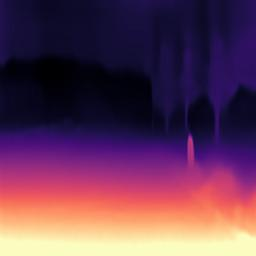

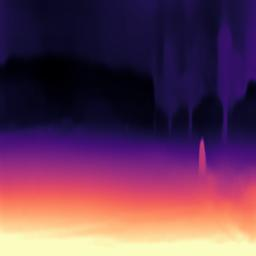

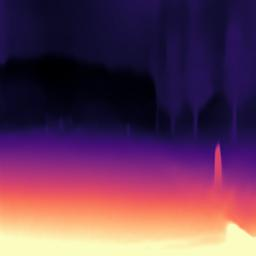

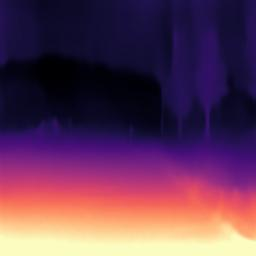

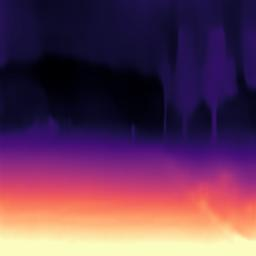

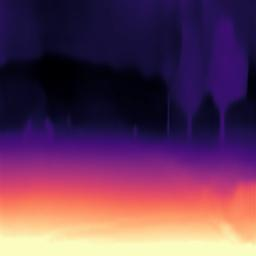

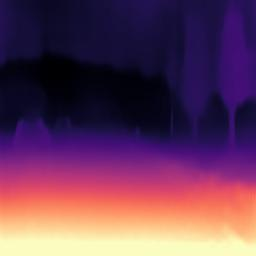

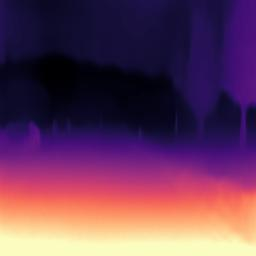

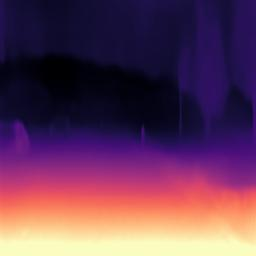

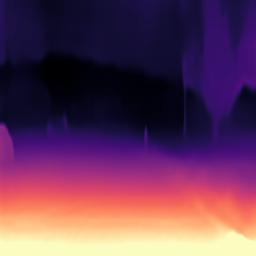

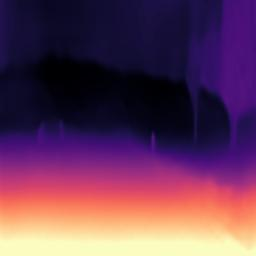

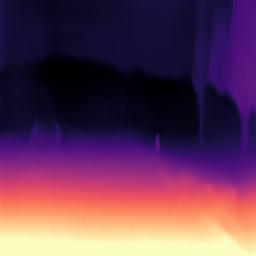

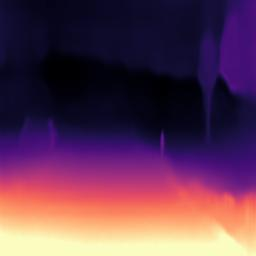

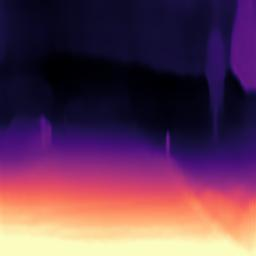

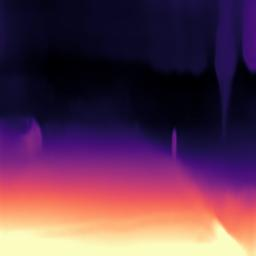

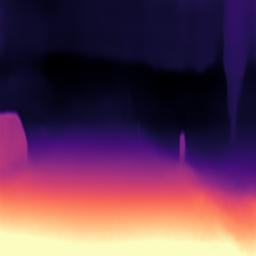

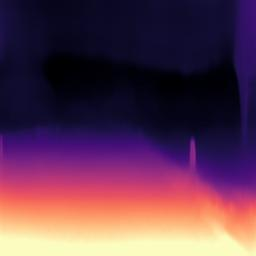

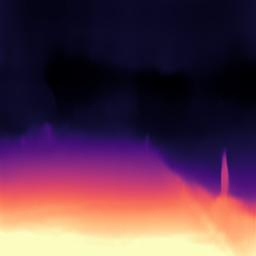

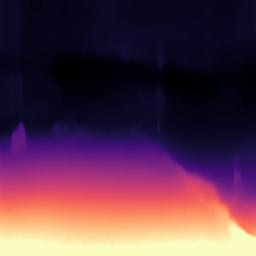

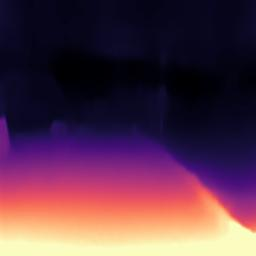

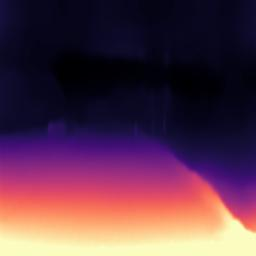

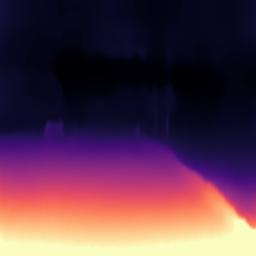

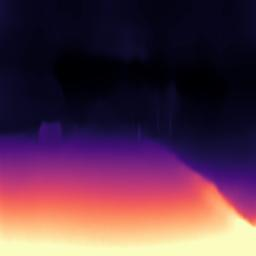

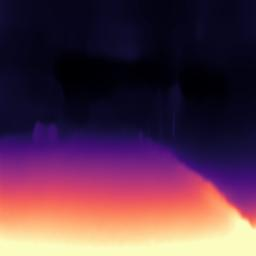

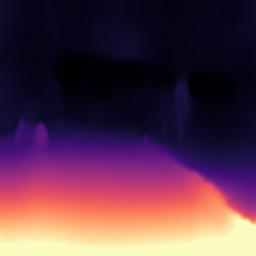

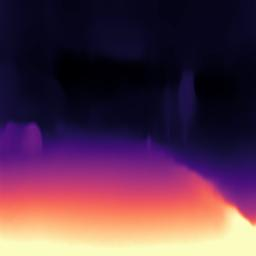

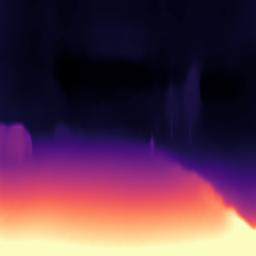

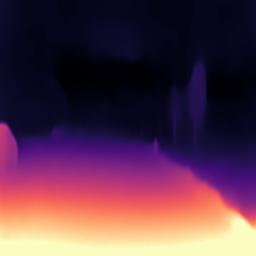

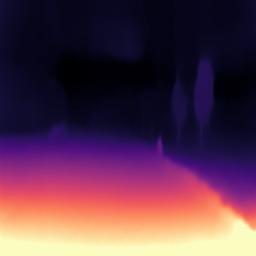

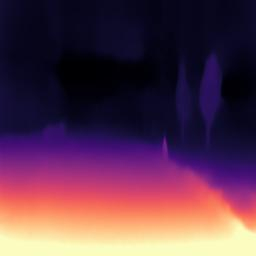

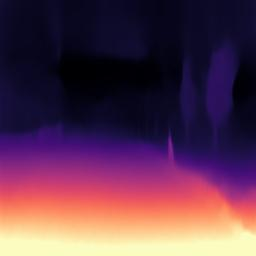

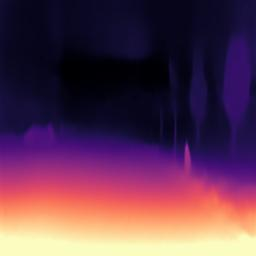

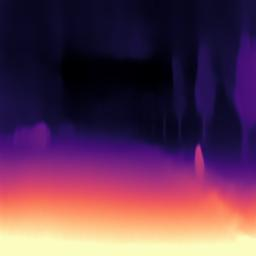

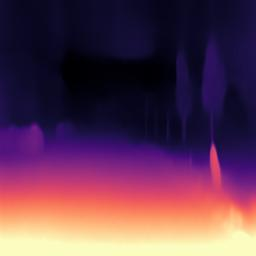

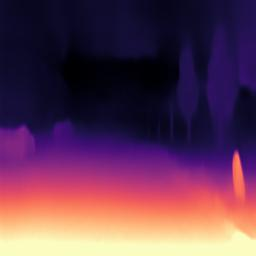

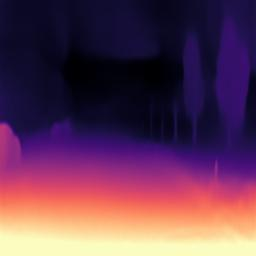

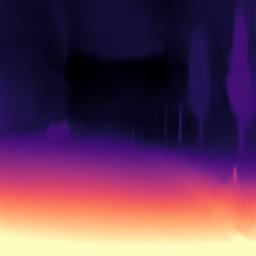

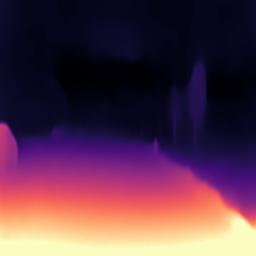

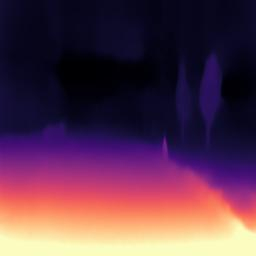

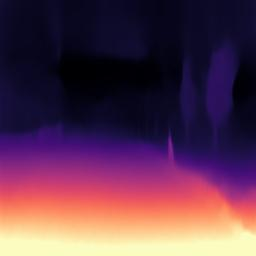

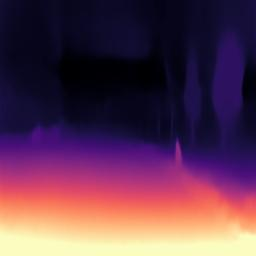

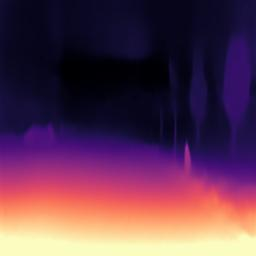

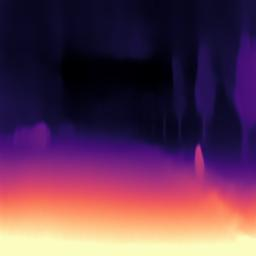

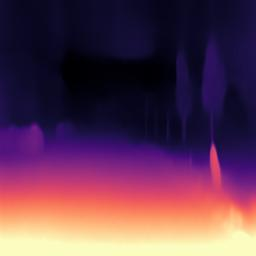

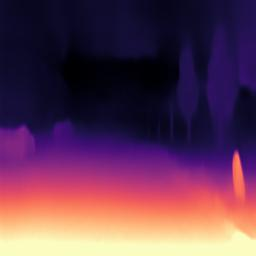

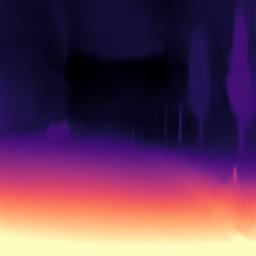

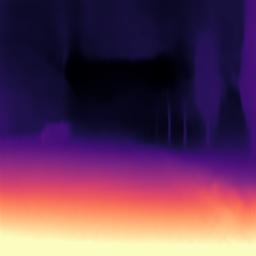

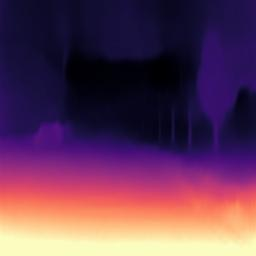

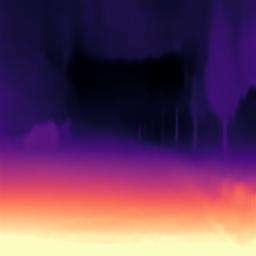

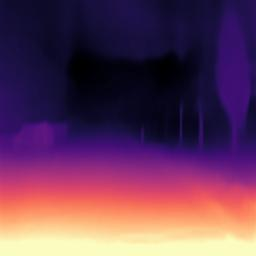

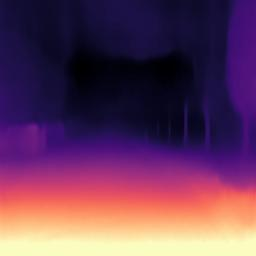

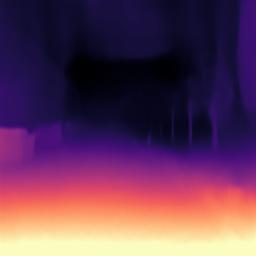

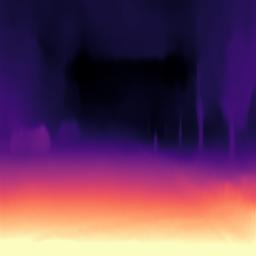

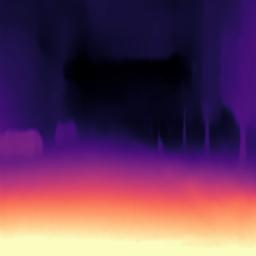

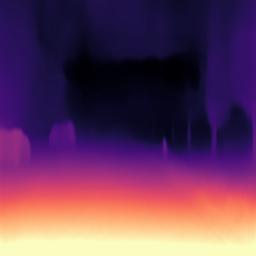

Video saved as: output_video1.mp4


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

def images_to_video(image_folder, video_name, fps):
    images = [img for img in os.listdir(image_folder) if img.lower().endswith((".png", ".jpeg"))]
    if not images:
        print("No JPEG images found in the specified folder.")
        return
    else:
        print("Found images:", images)

    images.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))  # Sort images based on their numeric part

    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for image in images:
        frame = cv2.imread(os.path.join(image_folder, image))
        video.write(frame)
        cv2_imshow(frame)
        cv2.waitKey(int(1000/fps))

    video.release()

    print("Video saved as:", video_name)

image_folder = '/content/drive/MyDrive/Dataset/output'
video_name = 'output_video1.mp4'
fps = 5

images_to_video(image_folder, video_name, fps)
